In [1]:
#####################################################################
#
#    CREATED : Jul6, 2021
#
#    NAME: 7)CountourPlots--CheckPlanck2022.ipynb
#
#
#    FORMER NAME: O2)MCMC--Using getDist for countour.ipynb
#
#    WHAT : We will plot out the contour plots using getDist
#    
#
#    DATA: 
#           '6)dataOut/Corner/flat_samples_TurnOff_dcdg=False_fullCov.npy'
#           '6)dataOut/Corner/flat_samples_TurnOff_dcdg=True_fullCov.npy'
#
#    (FROZEN 2022)
#    TAKES IN: 'OutputPlots/Corner/flat_samples_w_bg_FINAL.npy'
#              'OutputPlots/Corner/flat_samples_n_bg_FINAL.npy'
#
#####################################################################

# output
## these are all used in the paper 
       - [ ] '7)dataPlot/Corner/ContourPlots-getDist.pdf'                 --> full range
       - [ ] '7)dataPlot/Corner/ContourPlots-getDist_bcOnly.pdf'          --> just the bc  
       - [ ] '7)dataPlot/Corner/ContourPlots-getDist_bcOnly_Linear.pdf    --> bc only plotted linearly 

In [2]:
from __future__ import division
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy
import matplotlib.pyplot as plt
import math
import sys, platform, os
import re
import time
from datetime import date
import pprint
from numpy import genfromtxt
import importlib
plt.rcParams['figure.figsize']=(18,18)
%matplotlib inline
print(os.getcwd())
print(platform.python_version(),'python version')
import matplotlib.cm as cmap

#Astropy
from astropy import units as u
from astropy.coordinates import Angle
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy.utils.data import download_file
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.visualization import astropy_mpl_style
#Astropy cosmology
from astropy.cosmology import WMAP9 as cosmo

#Scipy
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.optimize import minimize

#treecorr
import treecorr

#pandas
import pandas as pd

# fitsio
import fitsio

#healpy
import healpy as hp 

#Linear Al
from numpy.linalg import inv

#CAMB
import camb
from camb import model, initialpower,get_matter_power_interpolator

# Print
np.set_printoptions(precision=2,threshold=np.inf)

#corner plot
import corner

#emcee
import emcee

# GET DIST
from getdist import plots, MCSamples
import getdist

# Let's get the pretty colors
cmap = plt.get_cmap('spring')

# This is the main Library where all the definitions are kept 
#F =  __import__('1)FLibrary')
#J =  __import__('2)JLibrary')
#O =  __import__('6)OLibrary')

/Users/tzegoh_1/Desktop/-1)tzegoh-finalProject/Final
3.12.7 python version


# Triangle plot
### https://getdist.readthedocs.io/en/latest/_summaries/getdist.plots.GetDistPlotSettings.html

In [3]:
# GET DIST
from getdist import plots, MCSamples
import getdist

In [4]:
flats = np.load('OutputData/Corner/flat_samples_TurnOff_dcdg=False_fullCov.npy')
flatsMinus = np.load('OutputData/Corner/flat_samples_TurnOff_dcdg=True_fullCov.npy')

steps = 10000
print(flats.shape)
print(flatsMinus.shape)

(32000, 8)
(32000, 8)


In [5]:
names = ['bc0','bc1','bc2','bc3','bg0','bg1','bg2','bg3']
labels =  ['bc0','bc1','bc2','bc3','bg0','bg1','bg2','bg3']

samples = MCSamples(samples=flats,names=names,labels=labels,
                     ranges = {'bc0':[0, 10], 'bc1':[0,10],
                               'bc2':[0, 10], 'bc3':[0,10],
                               'bg0':[0, 5], 'bg1':[0,5],
                               'bg2':[0, 5], 'bg3':[0,5],
                              })
samples2 = MCSamples(samples=flatsMinus, names=names,labels=labels,
                     label='Second set',
                     ranges = {'bc0':[0, 10], 'bc1':[0,10],
                               'bc2':[0, 10], 'bc3':[0,10],
                               'bg0':[0, 5], 'bg1':[0,5],
                               'bg2':[0, 5], 'bg3':[0,5],
                              })
          

Removed no burn in
Removed no burn in


In [6]:
names = ['bc0','bc1','bc2','bc3','bg0','bg1','bg2','bg3']
labels =  ['b_{c,0}','b_{c,1}','b_{c,2}','b_{c,3}','b_{g,0}','b_{g,1}','b_{g,2}','b_{g,3}']

samples = MCSamples(samples=flats,names=names,labels=labels,
                     ranges = {'bc0':[0, 10], 'bc1':[0,10],
                               'bc2':[0, 10], 'bc3':[0,10],
                               'bg0':[0, 5], 'bg1':[0,5],
                               'bg2':[0, 5], 'bg3':[0,5],
                              })
samples2 = MCSamples(samples=flatsMinus, names=names,labels=labels,
                     label='Second set',
                     ranges = {'bc0':[0, 10], 'bc1':[0,10],
                               'bc2':[0, 10], 'bc3':[0,10],
                               'bg0':[0, 5], 'bg1':[0,5],
                               'bg2':[0, 5], 'bg3':[0,5],
                              })

Removed no burn in
Removed no burn in


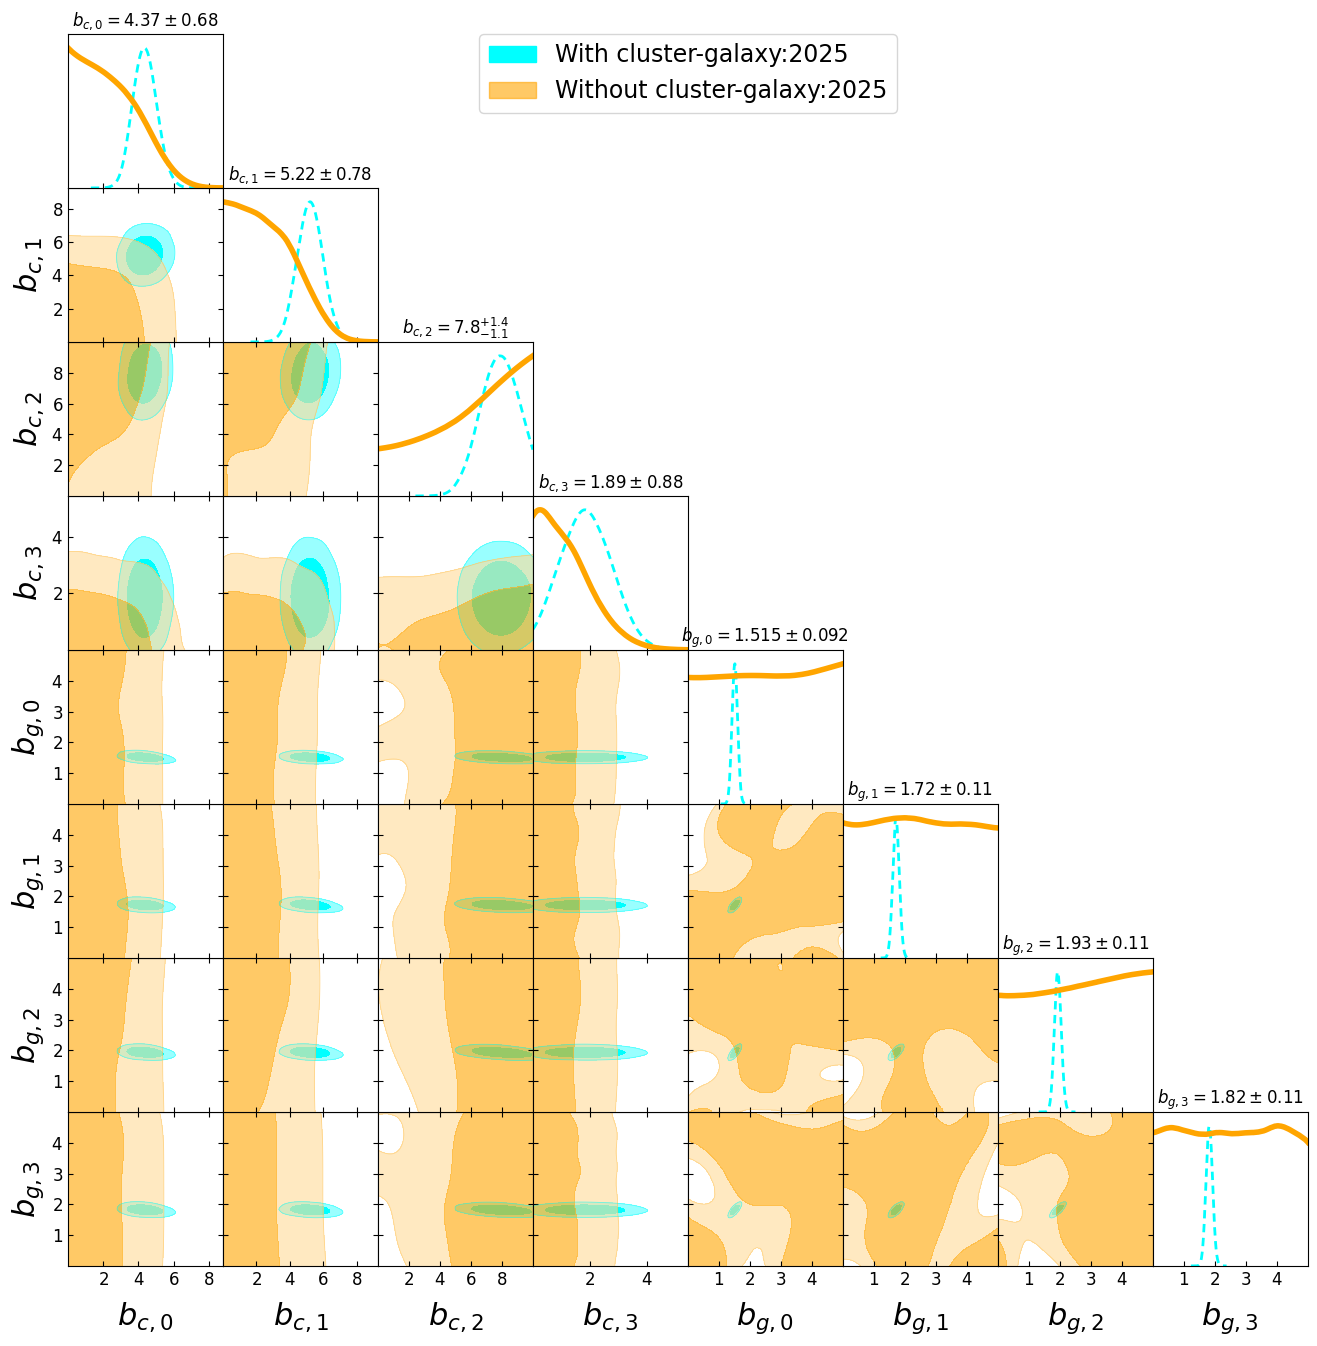

In [7]:
##### Triangle plot
# https://getdist.readthedocs.io/en/latest/_summaries/getdist.plots.GetDistPlotSettings.html
g = plots.get_subplot_plotter()
g.settings.alpha_filled_add=0.6
g.settings.title_limit_fontsize = 20
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 25
g.settings.legend_fontsize = 20
g.settings.fontsize = 20
g.settings.title_limit_fontsize =15

g.triangle_plot([samples, samples2],
                filled=True,
                legend_labels=['With cluster-galaxy:2025', 'Without cluster-galaxy:2025'],
                contour_colors=['cyan','orange'],
                line_args=[{'lw':2, 'ls':'--', 'color':'cyan'},
               {'lw':4, 'color':'orange'}], 
                title_limit=1,
                param_limits={'With bg Priors':(0, 10),'Without bg Priors':(0, 10)},
               )
#today = str(date.today())
#print(today)
#saveName = ('OutputPlots/Corner/ContourPlots-getDist_'+today+'.pdf')
saveName = ('OutputPlots/Corner/ContourPlots-getDist.pdf')
plt.savefig(saveName)

In [8]:
print(flats[:,0:4].shape)
print(flatsMinus[:,0:4].shape)

(32000, 4)
(32000, 4)


In [9]:
names = ['bc0','bc1','bc2','bc3']
labels =  ['b_{c,0}','b_{c,1}','b_{c,2}','b_{c,3}']

samples = MCSamples(samples=flats[:,0:4],names=names,labels=labels,
                     ranges = {'bc0':[0, 10], 'bc1':[0,10],
                               'bc2':[0, 10], 'bc3':[0,10],
                              })
samples2 = MCSamples(samples=flatsMinus[:,0:4], names=names,labels=labels,
                     label='Second set',
                     ranges = {'bc0':[0, 10], 'bc1':[0,10],
                               'bc2':[0, 10], 'bc3':[0,10],
                              })

Removed no burn in
Removed no burn in


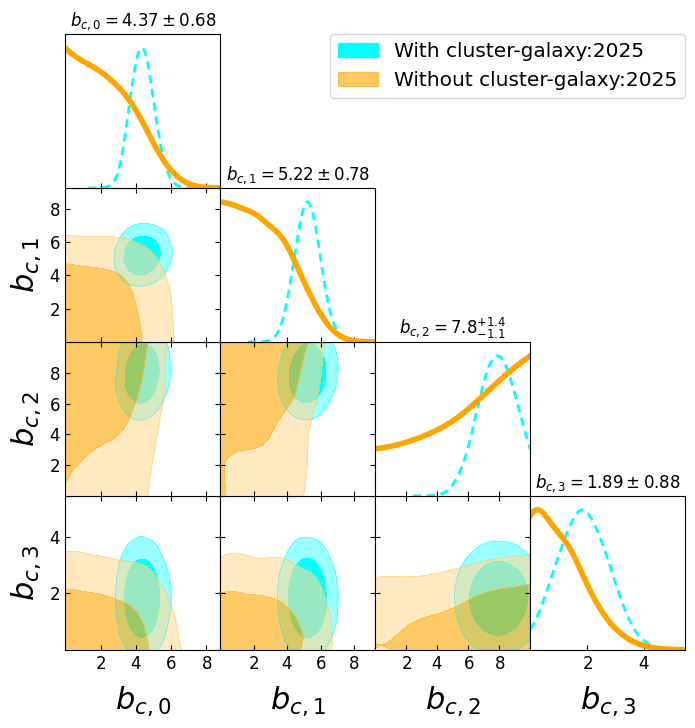

In [10]:
##### Triangle plot
# https://getdist.readthedocs.io/en/latest/_summaries/getdist.plots.GetDistPlotSettings.html
g = plots.get_subplot_plotter()
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 25
g.settings.legend_fontsize = 17.5
g.settings.fontsize = 20
g.settings.title_limit_fontsize =15


g.triangle_plot([samples, samples2],
                filled=True,
                legend_labels=['With cluster-galaxy:2025', 'Without cluster-galaxy:2025'],
                contour_colors=['cyan','orange'],
                line_args=[{'lw':2, 'ls':'--', 'color':'cyan'},
               {'lw':4, 'color':'orange'}], 
                title_limit=1,
                param_limits={'With bg Priors':(0, 10),'Without bg Priors':(0, 10)},
                legend_loc='upper right'
               )
#today = str(date.today())
#print(today)
#saveName = ('OutputPlots/Corner/ContourPlots-getDist_bcOnly'+today+'.pdf')
saveName = ('OutputPlots/Corner/ContourPlots-getDist_bcOnly.pdf')
plt.savefig(saveName)

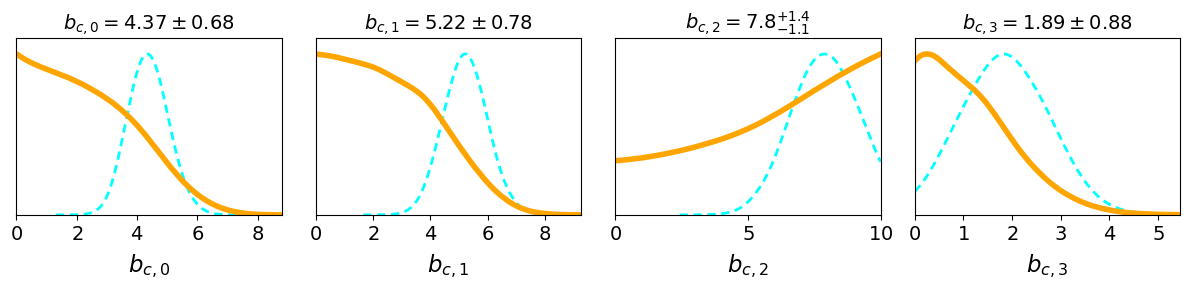

In [11]:
g = plots.get_subplot_plotter(subplot_size=12,width_inch=12,subplot_size_ratio=1)
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 17.5
g.settings.legend_fontsize = 15
g.settings.fontsize = 20
g.settings.title_limit_fontsize =15
g.settings.line_labels =False

g.plots_1d([samples, samples2],
                filled=True,
                nx=4,
                legend_ncol=2,
                legend_labels=['With cluster-galaxy:2025', 'Without cluster-galaxy:2025'],
                contour_colors=['cyan','orange'],
                line_args=[{'lw':2, 'ls':'--', 'color':'cyan'},
               {'lw':4, 'color':'orange'}], 
                title_limit=1,
                param_limits={'With bg Priors':(0, 10),'Without bg Priors':(0, 10)},
                loc='best',bbox_to_anchor=[2.32, 0.5]
               )
#today = str(date.today())
#print(today)
#saveName = ('OutputPlots/Corner/ContourPlots-getDist_bcOnly_Linear'+today+'.pdf')
saveName = ('OutputPlots/Corner/ContourPlots-getDist_bcOnly_Linear.pdf')
plt.savefig(saveName)



# That is it! Everything below is just for checking

In [12]:
#S

In [13]:
#T

In [21]:
#O

In [22]:
#P

In [23]:

flats = np.load(
    'OutputPlots/Corner/flat_samples_w_bg_turn_off_deltacdeltag=False_fullCov.npy')
flatsΩ = np.load(
    'OutputPlots/Corner/flat_samples_w_bg_turn_off_deltacdeltag=False_fullCov_OmegaM_5percent_PLANCK2022_mod.npy')
flatsΑ = np.load(
    'OutputPlots/Corner/flat_samples_w_bg_turn_off_deltacdeltag=False_fullCov_AS_5percent_PLANCK2022_mod.npy')
steps = 10000
print(flats.shape)
print(flatsΩ.shape)
print(flatsΑ.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'OutputPlots/Corner/flat_samples_w_bg_turn_off_deltacdeltag=False_fullCov.npy'

In [ ]:
names = ['bc0','bc1','bc2','bc3','bg0','bg1','bg2','bg3']
labels =  ['b_{c,0}','b_{c,1}','b_{c,2}','b_{c,3}','b_{g,0}','b_{g,1}','b_{g,2}','b_{g,3}']

samples = MCSamples(samples=flats,names=names,labels=labels,
                     ranges = {'bc0':[0, 10], 'bc1':[0,10],
                               'bc2':[0, 10], 'bc3':[0,10],
                               'bg0':[0, 5], 'bg1':[0,5],
                               'bg2':[0, 5], 'bg3':[0,5],
                              })
samples2 = MCSamples(samples=flatsΩ, names=names,labels=labels,
                     label='Second set',
                     ranges = {'bc0':[0, 10], 'bc1':[0,10],
                               'bc2':[0, 10], 'bc3':[0,10],
                               'bg0':[0, 5], 'bg1':[0,5],
                               'bg2':[0, 5], 'bg3':[0,5],
                              })
samples3 = MCSamples(samples=flatsΑ, names=names,labels=labels,
                     label='Second set',
                     ranges = {'bc0':[0, 10], 'bc1':[0,10],
                               'bc2':[0, 10], 'bc3':[0,10],
                               'bg0':[0, 5], 'bg1':[0,5],
                               'bg2':[0, 5], 'bg3':[0,5],
                              })

In [ ]:
##### Triangle plot
# https://getdist.readthedocs.io/en/latest/_summaries/getdist.plots.GetDistPlotSettings.html
g = plots.get_subplot_plotter()
g.settings.alpha_filled_add=0.6
g.settings.title_limit_fontsize = 20
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 25
g.settings.legend_fontsize = 20
g.settings.fontsize = 20
g.settings.title_limit_fontsize =15

g.triangle_plot([samples, samples2, samples3],
                filled=False,
                legend_labels=['Plank2020', 'Plank2020+5%Ωm', 'Plank2020+5%A'],
                contour_colors=['green','orange','magenta'],
                line_args=[{'lw':6, 'ls':'--', 'color':'green'},
               {'lw':4, 'color':'orange'},
                {'lw':2, 'color':'magenta','ls':':'}], 
                title_limit=1,
                #param_limits={'With bg Priors':(0, 10),'Without bg Priors':(0, 10)},
               )
today = str(date.today())
print(today)

In [ ]:
bias = np.load(
    'OutputData/Bias.npy')
biasΩ = np.load(
    'OutputData/Bias_OmegaM_5percent_PLANCK2022_mod.npy')
biasΑ = np.load(
    'OutputData/Bias_AS_5percent_PLANCK2022_mod.npy')


In [ ]:

diff = np.subtract(bias, biasΩ)
diffΩ = diff/bias
diff_Ω = np.mean(diff,axis=0)
print(diff_Ω,'diff_Ω')

diff = np.subtract(bias, biasΑ)
diffA = diff/bias
diff_A = np.mean(diff,axis=0)
print(diff_A,'diff_A')

In [ ]:
'''Here we do multiple corner plots -- one on top of another '''

In [ ]:
flats = np.load('OutputPlots/Corner/flat_samples_w_bg_w_ShivamRange.npy')
flatsNoBg = np.load('OutputPlots/Corner/flat_samples_n_bg_w_ShivamRange.npy')

In [ ]:
'''12) The corner plot'''

labels = ['bc0','bc1','bc2','bc3','bg0','bg1','bg2','bg3']
colors = ['orange','orange','orange','orange',
          'cyan','cyan','cyan','cyan',]

fig = corner.corner(
    flats, labels=labels, truths=['bc0','bc1','bc2','bc3',
                                 'bg0','bg1','bg2','bg3',],
                       show_titles=True, 
                       title_fmt=".2f",
                       title_kwargs={"fontsize": 20,
                                      "color":'black'
                                    },
                       label_kwargs={"fontsize": 24,
                                     "fontweight":'bold',
                                      "color":'grey'
                                     },
                       
                       hist_kwargs={"color":"orange",
                                     "alpha":0.2,
                                     "histtype":"stepfilled",
                                   },
                       contour_kwargs = {"colors":"yellow",
                                     "alpha":0.6,
                                    },
                       data_kwargs = {"color":"yellow",
                                     "alpha":0.5,
                                      "mec":"yellow",
                                       "ms" :3
                                    },
                     quantiles=[0.16, 0.5, 0.84],
                       color = "orange",
                       plot_contours = True,
                       plot_density = True,
                       verbose = True,
    
    
    
    
    
    
    
);

corner.corner( flatsNoBg, fig=fig,
                                     show_titles=True, 
                       title_fmt=".2f",
                       title_kwargs={"fontsize": 20,
                                      "color":'black'
                                    },
                       label_kwargs={"fontsize": 20,
                                     "fontweight":'bold',
                                      "color":'grey'
                                     },
                       
                       hist_kwargs={"color":"green",
                                     "alpha":0.08,
                                     "histtype":"stepfilled",
                                   },
                       contour_kwargs = {"colors":"cyan",
                                     "alpha":0.08,
                                    },
                       data_kwargs = {"color":"green",
                                     "alpha":0.08,
                                      "mec":"grey",
                                       "ms" :3
                                    },
                     quantiles=[0.16, 0.5, 0.84],
                       color = "blue",

                       plot_contours = True,
                       plot_density = True,
                       verbose = True,
              
             )






TITLE = str("Contour Plot: Priors Bg \n vs \n no Priors BG \n " + str(steps)+' steps')
fig.gca().annotate(TITLE,
                      xy=(0.82, 0.95), xycoords="figure fraction",
                      xytext=(-20, -10), textcoords="offset points",
                      ha="center", va="top",
                      fontsize = 40, fontweight = 'bold',
                      color = "grey", alpha = 0.58, 
                     )

In [ ]:
'''12) The corner plot'''

labels = ['bc0','bc1','bc2','bc3','bg0','bg1','bg2','bg3']
colors = ['orange','orange','orange','orange',
          'cyan','cyan','cyan','cyan',]

fig = corner.corner(
    
     flatsNoBg,
                                     show_titles=True, 
                       title_fmt=".2f",
                       title_kwargs={"fontsize": 20,
                                      "color":'black'
                                    },
                       label_kwargs={"fontsize": 20,
                                     "fontweight":'bold',
                                      "color":'grey'
                                     },
                       
                       hist_kwargs={"color":"green",
                                     "alpha":0.08,
                                     "histtype":"stepfilled",
                                   },
                       contour_kwargs = {"colors":"cyan",
                                     "alpha":0.08,
                                    },
                       data_kwargs = {"color":"green",
                                     "alpha":0.08,
                                      "mec":"grey",
                                       "ms" :3
                                    },
                     quantiles=[0.16, 0.5, 0.84],
                       color = "blue",

                       plot_contours = True,
                       plot_density = True,
                       verbose = True,
    
    
    
    
    
    
    
    
);

corner.corner(     
    flats, labels=labels, fig = fig,
    truths=['bc0','bc1','bc2','bc3',
                                 'bg0','bg1','bg2','bg3',],
                       show_titles=True, 
                       title_fmt=".2f",
                       title_kwargs={"fontsize": 20,
                                      "color":'black'
                                    },
                       label_kwargs={"fontsize": 24,
                                     "fontweight":'bold',
                                      "color":'grey'
                                     },
                       
                       hist_kwargs={"color":"orange",
                                     "alpha":0.2,
                                     "histtype":"stepfilled",
                                   },
                       contour_kwargs = {"colors":"yellow",
                                     "alpha":0.6,
                                    },
                       data_kwargs = {"color":"yellow",
                                     "alpha":0.5,
                                      "mec":"yellow",
                                       "ms" :3
                                    },
                     quantiles=[0.16, 0.5, 0.84],
                       color = "orange",
                       plot_contours = True,
                       plot_density = True,
                       verbose = True,
              
             )






TITLE = str("Contour Plot: Priors Bg \n vs \n no Priors BG \n " + str(steps)+' steps')
fig.gca().annotate(TITLE,
                      xy=(0.82, 0.95), xycoords="figure fraction",
                      xytext=(-20, -10), textcoords="offset points",
                      ha="center", va="top",
                      fontsize = 40, fontweight = 'bold',
                      colo